# Handwritten digit classification
Решим задачу классификации на классическом примере датасета рукописных цифр с помощью многослойного перцептрона  
Загрузка обучающих и тестовых примеров из  датасета **MNIST**:
  * датасет из Keras(https://keras.io/datasets/) Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images (https://keras.io/datasets/#mnist-database-of-handwritten-digits).
  * датасет из Scikit-Learn ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1280, 1279, 3)


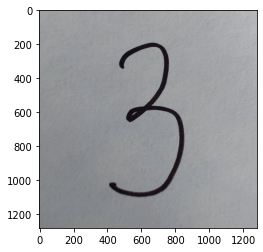

In [ ]:
img = cv2.imread("/content/drive/MyDrive/АБД/Задания/5. Классификация_Нейроны/MNIST/img/3.jpg")
print(img.shape)
plt.imshow(img)

(1280, 1279)


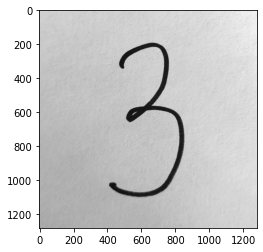

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')

(28, 28)


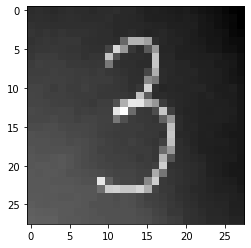

In [ ]:
resized = cv2.resize(gray_image, (28,28), interpolation = cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized, cmap='binary')

(28, 28)


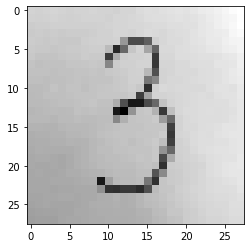

In [ ]:
resized = cv2.bitwise_not(resized)
print(resized.shape)
plt.imshow(resized, cmap='binary')

(28, 28)


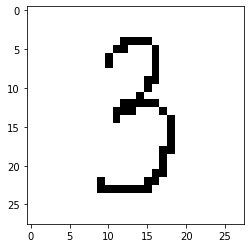

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)
print(blackAndWhiteImage.shape)
plt.imshow(blackAndWhiteImage, cmap='binary')

### Загрузка и визуализация данных  из MNIST

Из dataset считываем обучающую и тестовые выборки:
  Из документации Keras (https://keras.io/datasets/#mnist-database-of-handwritten-digits)  метод load_data()
  _Returns:_
2 tuples:
 *  x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
 *  y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from tensorflow.keras.datasets import mnist

print (tf.__version__)
print (tf.keras.__version__)

2.11.0
2.11.0


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

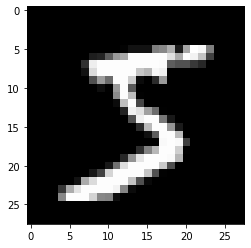

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

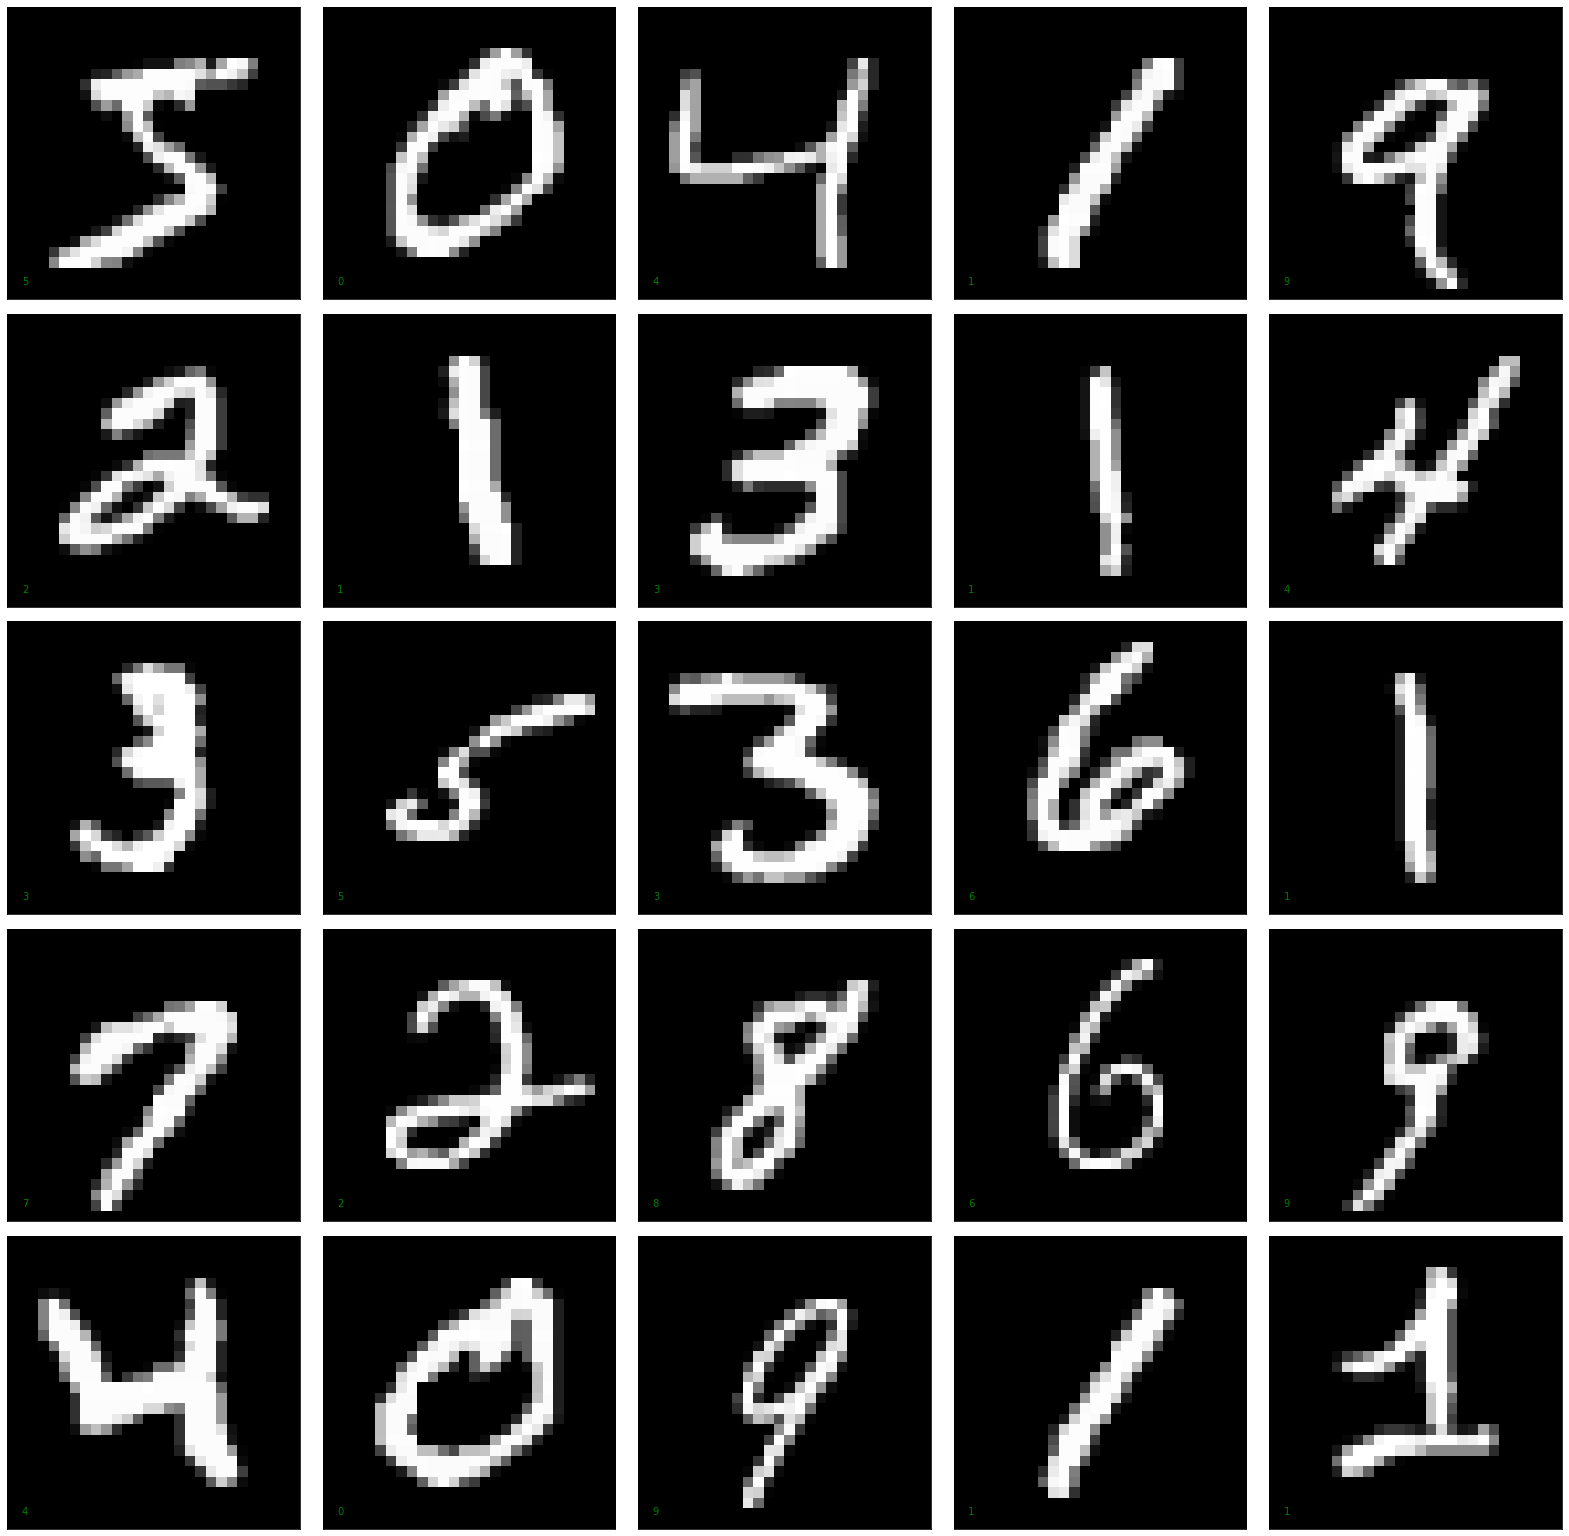

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(28, 28),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.05, wspace=0.05))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_train[i]),
            transform=ax.transAxes, color='green')

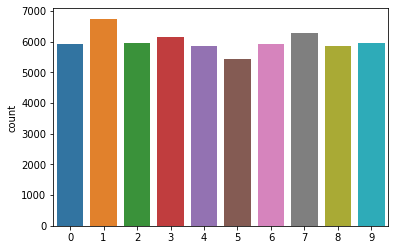

In [ ]:
# проверим баланс классов
import seaborn as sns

sns.countplot(x=y_train)
plt.show()

##  Нормализация данных
 Нормализуем данные путем приведения значений яркостей из диапазона $0...255$ в $[0,1]$:
  * Замечание: яркость нормализуют в диапазон $[-1,1]$ или $[0,1]$ в зависимости от используемой далее активационной функции

In [ ]:
# Вспомогательные данные о массивах:
print(x_test.shape[0])
print(x_test.shape[1])
print(x_test.shape[2])

10000
28
28


In [ ]:
x_train2 = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])  # в одномерный тензор (вектор)
x_test2 = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
x_train2 = x_train2.astype("float32")
x_test2 = x_test2.astype("float32")
x_train2/= 255

x_test2/= 255

print(x_train2.shape)
print(x_test2.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Коллективные модели

## Voting classifier

<img src=http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier_files/majority_voting.png width=400/>

</br>

**Метод простого голосования**
* $c_1, c_2, ..., c_m$ - обученные алгоритмы  
* Классификация: относим $x$ к классу, за который проголосовало *большинство* из $c_1(x), c_2(x), ..., c_m(x)$
* Регрессия: ответом является среднее значение $c_1(x), c_2(x), ..., c_m(x)$

## [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
![Важность количества соседей](https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png)

Алгоритм kNN состоит из трех последовательных этапов:
1. Вычислить расстояние от целевого объекта (который необходимо классифицировать) до каждого из объектов обучающей выборки (уже маркированных каким-либо классом);
2. Отобрать k объектов обучающей выборки, расстояния до которых минимальны (на первом этапе k выбирается произвольно, затем итеративно подбирается лучшее значение k на основе точности полученных прогнозов при каждом из выбранных k );
3. Получить класс объекта на основе наиболее часто встречающегося среди k ближайших соседей (это может быть число или название класса в зависимости от того, как изначально были обозначены классы).

In [ ]:
# классификатор на 3 соседях
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# "обучается" knn быстро.
%time knn.fit(x_train2, y_train)

CPU times: user 27 ms, sys: 1.9 ms, total: 28.9 ms
Wall time: 29.8 ms


KNeighborsClassifier(n_neighbors=3)

7


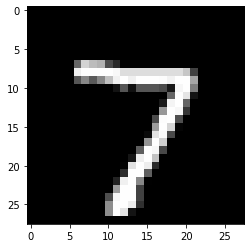

In [ ]:
# возьмем первое тестовое наблюдение
print(y_test[0])
plt.imshow(x_test[0], cmap="Greys_r")
plt.show()

In [ ]:
# что предсказывает модель?
knn.predict(np.expand_dims(x_test2[0], axis=0))

array([7], dtype=uint8)

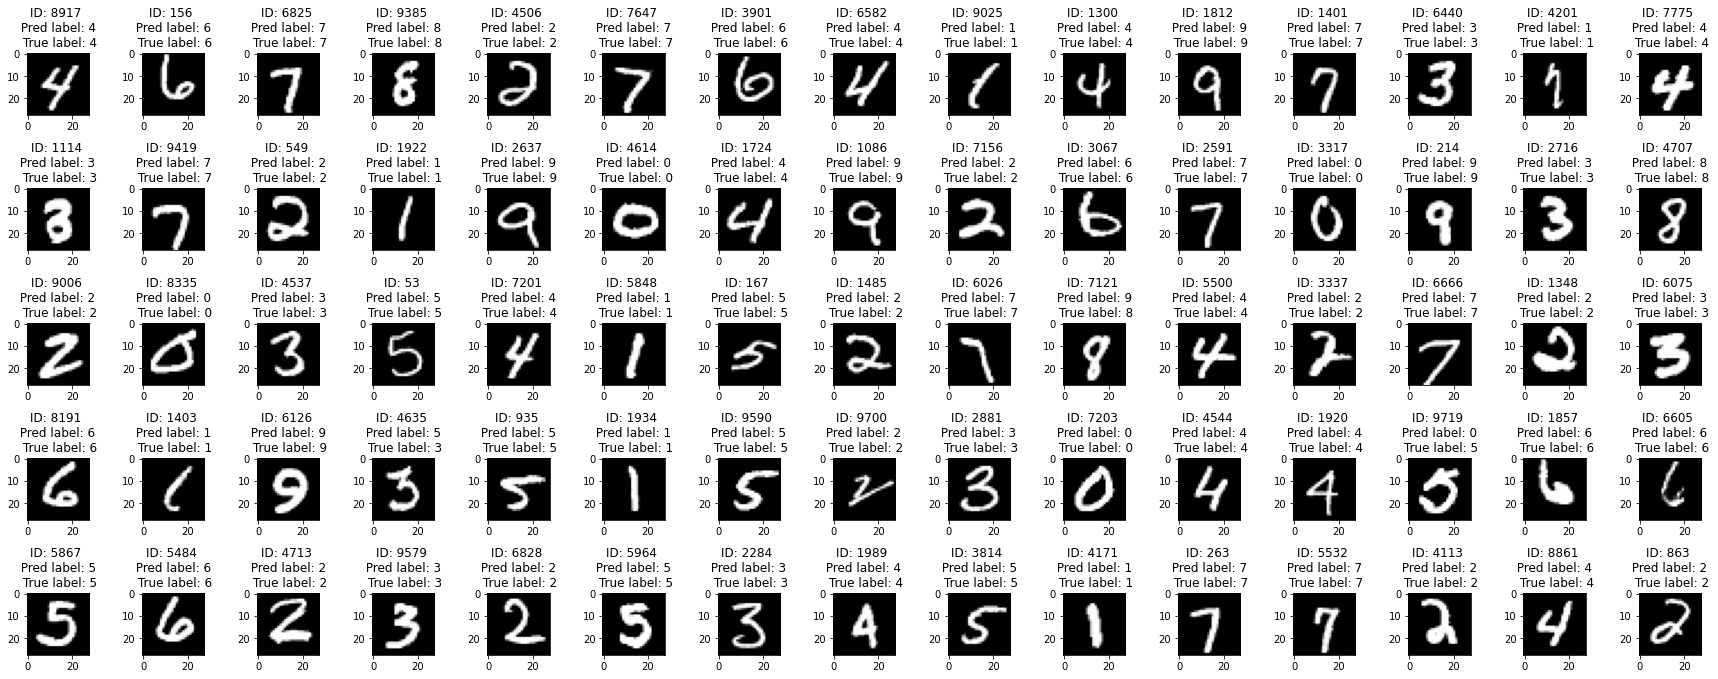

In [ ]:
# рассмотрим 15 на 5 тестовых и визуализируем
n_x, n_y = 15, 5
n = n_x * n_y
plt.figure(figsize=(30,12))

img_ids = np.random.randint(x_test.shape[0], size=n)

for i, id in zip(np.arange(n), img_ids):  
    plt.subplot(n_y, n_x, i+1)
    plt.imshow(x_test[id], cmap="Greys_r")
    y_pred = knn.predict(np.expand_dims(x_test2[id], axis=0))[0]
    plt.subplots_adjust(wspace=0.85)
    plt.title(f'ID: {id} \n Pred label: {y_pred} \n True label: {y_test[id]}')
plt.show()

In [ ]:
# а вот работает медленно!
%time y_pred = knn.predict(x_test2)

CPU times: user 57.3 s, sys: 79 ms, total: 57.4 s
Wall time: 34.3 s


In [ ]:
# оценим точность
error = 0
confusion_matrix = np.zeros([10,10], dtype=np.int32)
for i in range(x_test2.shape[0]):
  confusion_matrix[y_test[i], y_pred[i]] += 1
  if y_test[i] != y_pred[i]:
      error +=1

print(confusion_matrix)
print("\nErrors in validation set: ", error)
print("\nError Percentage : ", (error*100)/y_pred.shape[0], "%")
print("\nAccuracy : ", 100-(error*100)/y_pred.shape[0], "%")
print("\nTesting dataset shape :", y_pred.shape[0])

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]

Errors in validation set:  295

Error Percentage :  2.95 %

Accuracy :  97.05 %

Testing dataset shape : 10000


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9705

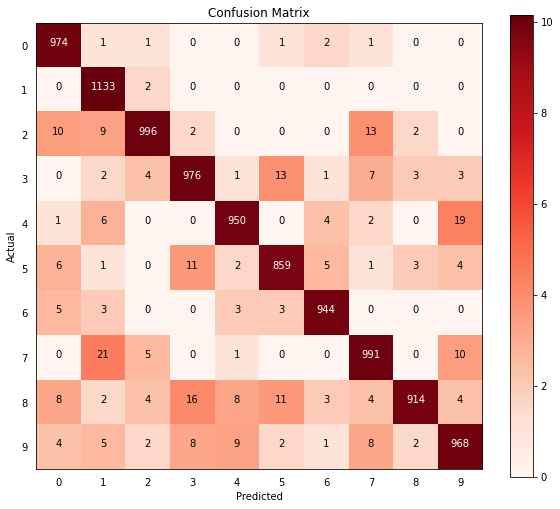

In [ ]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(model, X, y):
  return ConfusionMatrixDisplay.from_estimator(model, X, y, cmap=plt.cm.Blues)

## DecisionTreeClassifier
(использовали на прошлом семинаре)

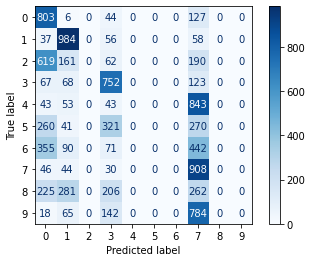

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=13, max_depth=2)
tree.fit(x_train2, y_train)
y_predict_tree = tree.predict(x_test2)
plot_confusion_matrix(tree, x_test2, y_test)

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(tree)
print(tree_rules)

|--- feature_350 <= 0.52
|   |--- feature_568 <= 0.00
|   |   |--- class: 7
|   |--- feature_568 >  0.00
|   |   |--- class: 0
|--- feature_350 >  0.52
|   |--- feature_489 <= 0.10
|   |   |--- class: 3
|   |--- feature_489 >  0.10
|   |   |--- class: 1



In [ ]:
tree.score(x_test2, y_test)

0.3447

In [ ]:
accuracy_score(y_test, y_predict_tree, normalize = True)

0.3447

### Voting classifier
Объединение результатов нескольких моделей. Усреднение классификаций ("жесткое" голосование) или усреднение уверенностей ("мягкое" голосование).

In [ ]:
classifiers = [('dt', tree), ('knn', knn)]
classifiers

[('dt', DecisionTreeClassifier(max_depth=2, random_state=13)),
 ('knn', KNeighborsClassifier(n_neighbors=3))]

0.5594

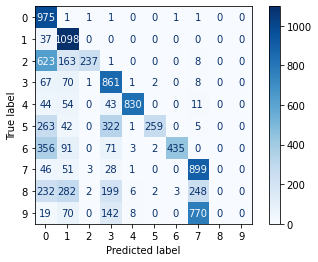

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers, voting='hard')
vc.fit(x_train2, y_train)
plot_confusion_matrix(vc, x_test2, y_test)
vc.score(x_test2, y_test)

#### Оптимизация параметров в коллективной модели
Примерно так же как в pipeline, у параметров добавляется префикс модели.

In [ ]:
params = {'dt__max_depth' : np.arange(1, 6),
          'knn__n_neighbors' : np.arange(1, 10),
          'voting' : ['hard', 'soft']} 
np.prod([len(v) for k, v in params.items()])

90

__RandomizedSearchCV__
---
В то время как поиск по сетке (GridSearchCV) рассматривает все возможные комбинации гиперпараметров, чтобы найти лучшую модель, случайный поиск (RandomizedSearchCV) выбирает и тестирует только случайную комбинацию гиперпараметров.

Эта техника вместо исчерпывающего поиска делает случайную выборку из сетки гиперпараметров.

Мы можем указать общее количество попыток случайного поиска (`n_iter`), прежде чем будет получена наилучшая модель. Большое количество итераций приведет к улучшению качества производительности, но при этом будет достаточно трудоемким.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

%time optimal = RandomizedSearchCV(estimator=vc, param_distributions=params, n_iter=30, scoring='accuracy', n_jobs=-1).fit(x_train2, y_train)

CPU times: user 20.4 s, sys: 1.76 s, total: 22.1 s
Wall time: 1h 28min 52s


In [ ]:
optimal.best_params_

{'voting': 'soft', 'knn__n_neighbors': 1, 'dt__max_depth': 4}

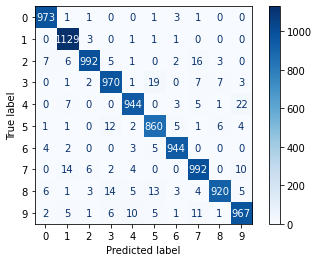

In [ ]:
plot_confusion_matrix(optimal, x_test2, y_test)

In [ ]:
optimal.score(x_test2, y_test)

0.9691

# Нейронные сети

* Шолле Франсуа - Глубокое обучение на Python (https://www.dropbox.com/s/5c7tel5jb0v8hva/Chollet_F._Glubokoe_obuchenie_na_Python.pdf?dl=0)

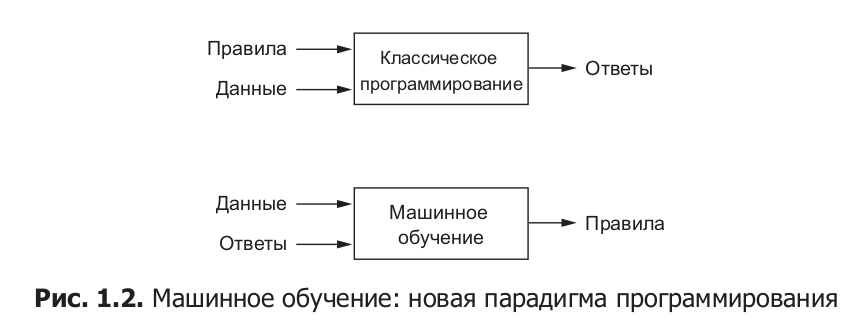

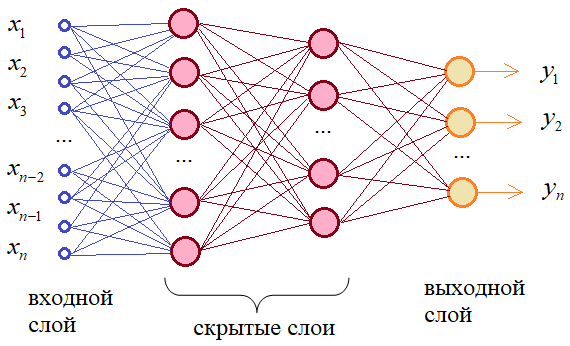

## Как обучается нейронная сеть?
 * Веса (weights)?
 * Функция потерь (loss function)?
 * Оптимизатор (optimizer)?

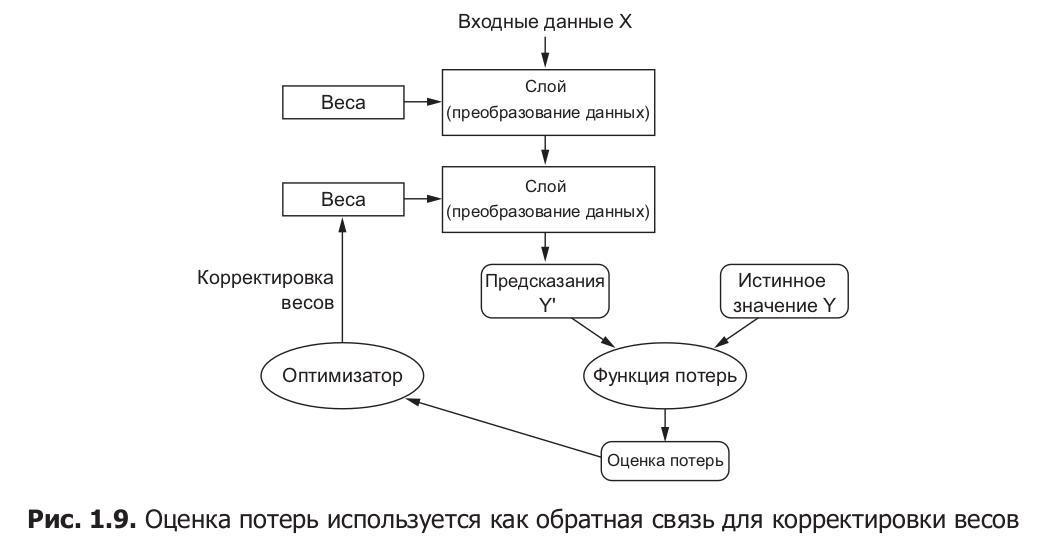

## <img src="https://keras.io/img/logo.png" height='40px'/>

---
[Keras](https://keras.io/) — библиотека, предоставляющая высокоуровневые cтроительные блоки для конструирования моделей глубокого обучения.

Модель в `Keras` можно описать двумя способами:
1. с использованием класса Sequential (только для линейного стека слоев) 
2. с помощью функционального API (для ориентированного ациклического графа слоев, позволяющего конструировать произвольные архитектуры). Функциональный API позволяет манипулировать данными в тензорах, которые обрабатывает модель, и применять слои к этим тензорам, как если бы они были функциями.

```python
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
```
**или**
```python
model = Sequential([
    Dense(512, input_shape=(max_words,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])
```

> ЧТО ТАКОЕ ФУНКЦИИ АКТИВАЦИИ И ЗАЧЕМ ОНИ НУЖНЫ?  
Без функции активации, такой как relu (также называемой фактором нелинейности), слой Dense будет состоять из двух линейных операций — скалярного произведения и сложения:  
 output = dot(W, input) + b  
Такой слой сможет обучаться только на линейных (аффинных) преобразованиях входных данных: пространство гипотез слоя было бы совокупностью всех возможных линейных преобразований входных данных в 16-мерное пространство. Такое пространство гипотез слишком ограниченно, и наложение нескольких слоев представлений друг на друга не приносило бы никакой выгоды, потому что глубокий стек линейных слоев 
все равно реализует линейную операцию: добавление новых слоев не расширяет пространства гипотез.
Чтобы получить доступ к более обширному пространству гипотез, дающему дополнительные выгоды от увеличения глубины представлений, необходимо применить нелинейную функцию, или функцию активации. Функция активации relu — самая популярная в глубоком обучении, однако на выбор имеется еще несколько функций активации с немного странными на первый взгляд именами: prelu, elu и  т. д .  
-- <cite>Шолле, с. 97</cite>

[Функции активации в keras](https://keras.io/api/layers/activations/#available-activations)

### Обучение модели

Процесс обучения состоит в передаче массивов Numpy с входными данными (и соответствующими целевыми данными) в метод `fit()`

Сеть перебирает обучающие данные пакетами (`batch`). Для каждого пакета сеть вычисляет градиенты весов с учетом потерь в пакете и изменяет значения весов в соответствующем направлении.

Когда весь набор данных проходят через модель, заканчивается эпоха (`epoch`) обучения - одна итерация цикла.

#### Объект history

Вызов `model.fit()` возвращает объект History. Этот объект имеет поле `history` - словарь со значениями функции потерь и метрики 

### Векторизация

In [ ]:
print(y_train[0])

5


Векторизовать метки можно с помощью прямого кодирования  
Прямое кодирование (`one hot encoding`) широко используется для форматирования категорий и также называется кодированием категорий (`categorical encoding`). В данном случае прямое кодирование меток заключается в конструировании вектора с нулевыми элементами со значением 1 в элементе, индекс которого соответствует индексу метки  
  
Преобразуем метки в тензорный объект, например, для 4 классов (с номерами $0,1,2,3$),
метка класса 3 будет преобразована в массив:
$$ label 3 \to [0,0,1,0].$$

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_test[1]

2

In [ ]:
nb_classes=10
#convert class vectors to binary class matrices
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
print(y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 - 2s - loss: 0.6767 - accuracy: 0.8335 - val_loss: 0.3851 - val_accuracy: 0.8988 - 2s/epoch - 4ms/step
Epoch 2/15
469/469 - 1s - loss: 0.3626 - accuracy: 0.9011 - val_loss: 0.3191 - val_accuracy: 0.9137 - 720ms/epoch - 2ms/step
Epoch 3/15
469/469 - 1s - loss: 0.3196 - accuracy: 0.9122 - val_loss: 0.2967 - val_accuracy: 0.9190 - 717ms/epoch - 2ms/step
Epoch 4/15
469/469 - 1s - loss: 0.3000 - accuracy: 0.9167 - val_loss: 0.2852 - val_accuracy: 0.9211 - 778ms/epoch - 2ms/step
Epoch 5/15
469/469 - 1s - loss: 0.2880 - accuracy: 0.9201 - val_loss: 0.2792 - val_ac

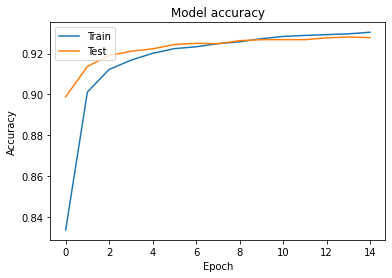

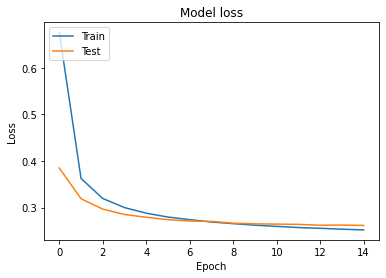

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

model = models.Sequential()
model.add(layers.Dense(10, input_shape=(784,), activation='softmax'))  # softmax - функция активации, как правило используемая при решении задачи классификации: https://www.helenkapatsa.ru/softmaks/

model.summary() #Print model info

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train2, y_train, batch_size=128, epochs=15, verbose=2, validation_data=(x_test2, y_test))

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test2, y_test)  # Returns the loss value & metrics values for the model in test mode

313/313 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.9278


[0.2617102265357971, 0.9277999997138977]

In [ ]:
x_test00 = x_test[0].reshape(1,784)
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
prediction = model.predict(x_test00)
print('prediction: ', prediction)
classes = range(10)
class_predicted = classes[np.argmax(prediction)]
class_predicted

1/1 [==============================] - 0s 61ms/step
prediction:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


7

## Проверка модели на собственных данных

## Белое на чёрном (Paint)

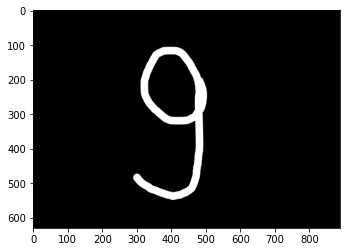

In [ ]:
img = cv2.imread("/content/drive/MyDrive/АБД/Задания/5. Классификация_Нейроны/MNIST/img/9.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21  69  25   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23 218 180 216  18   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 120  84   0  82 137   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 189   5   0   1 193   6   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19 166   0   0   0 121  8

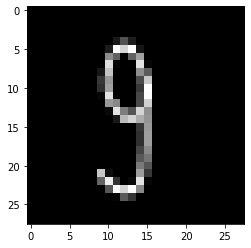

In [ ]:
resized = cv2.resize(gray_image, (28,28), interpolation = cv2.INTER_AREA)
print(resized)
plt.imshow(resized, cmap='gray')

In [ ]:
resized = resized.reshape(1,784)
resized = resized / 255
resized.shape

(1, 784)

In [ ]:
prediction = model.predict(resized)
classes = range(10)
class_predicted = classes[np.argmax(prediction)]
class_predicted

1/1 [==============================] - 0s 37ms/step


5

## Чёрное на белом (нарисовано от руки и сфотографировано)

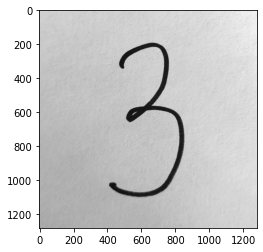

In [ ]:
img = cv2.imread("/content/drive/MyDrive/АБД/Задания/5. Классификация_Нейроны/MNIST/img/3.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [ ]:
resized = cv2.resize(gray_image, (28,28), interpolation = cv2.INTER_AREA)
print(resized)

[[159 158 159 160 159 158 159 159 160 159 159 158 160 160 163 165 164 166
  167 168 167 169 172 173 175 178 181 183]
 [158 157 158 159 158 157 158 159 159 159 158 160 160 161 162 164 165 165
  166 167 166 167 169 172 174 177 178 182]
 [155 156 156 157 157 157 157 157 157 158 159 160 160 161 161 162 163 163
  165 165 166 166 169 171 174 176 179 183]
 [154 155 154 155 154 155 155 155 156 158 158 160 160 159 161 163 162 161
  163 164 165 167 169 171 172 173 178 180]
 [155 154 153 154 153 153 153 156 157 158 158 159 127  85  85  96 157 161
  163 163 165 167 168 171 171 174 176 177]
 [154 153 153 152 153 154 154 155 156 156 146  66 101 152 159 134  99 162
  162 164 165 166 167 169 170 173 174 177]
 [153 150 150 150 152 153 153 155 154 154  77 138 156 158 158 159  76 161
  161 164 164 165 166 166 167 169 170 174]
 [150 148 149 149 149 151 151 152 153 152 117 155 157 157 159 159  75 160
  160 162 162 164 165 165 168 168 169 174]
 [149 149 149 148 149 149 150 150 151 150 153 154 155 157 158 14

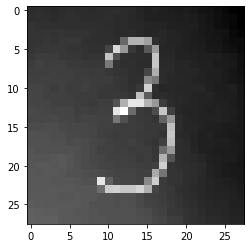

In [ ]:
resized = 1 - resized  # из черного на белом - в белое на черном
plt.imshow(resized, cmap='gray')

In [ ]:
resized = resized.reshape(1, 784)
resized = resized / 255
resized.size

784

In [ ]:
prediction = model.predict(resized)
classes = range(10)
class_predicted = classes[np.argmax(prediction)]
class_predicted

1/1 [==============================] - 0s 18ms/step


3

## [Свёрточная сеть](https://habr.com/ru/post/309508/)
![Свёрточная сеть](https://static.wikia.nocookie.net/mashinnoeobychenieanaii1581abk/images/8/81/Img-fOep_U.png/revision/latest?cb=20181006173153&path-prefix=ru)
![Свёртка](https://www.helenkapatsa.ru/content/images/size/w1000/2021/05/cnn-convolution.gif)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils


model2 = models.Sequential()
model2.add(layers.Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=x_train.shape)
)
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())  # разворачивает в 1-мерный вектор
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(nb_classes, activation='softmax'))


from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2.png', show_shapes=True)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model2.fit(x_train2, y_train, batch_size=128, epochs=15, verbose=2, validation_data=(x_test2, y_test))

print(history.history.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Домашнее задание-1
Построить наилучший voting classifier для классификации цветков ириса. Оценить качество работы.

---

# Домашнее задание-2
---
1. Построить свой перцептрон для набора данных MNIST, постараться обучить модель так, чтобы точность была >= 95% (попробуйте поэкспериментировать с гиперпараметрами либо слоями)
2. Проверить модель на своих собственных изображениях:
  * Нарисованное в Paint белой кистью на чёрном листе
  * Написанное от руки чёрным фломастером на белом листе
---
# Альтернативное задание вместо домашнего задания-2
Построить свою нейронную сеть для классификации датасета ["Fruits & Vegetables"](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition) (или по любому своему датасету изображений, если таковой имеется). Замерить время обучения, оценить точность, проверить на новых данных.